# Special Note on Data:

* Click on this [Link for Data](https://jupyterhub.uclatall.com/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fbenjum%2FUCLAX-24Fall-EDA&urlpath=tree%2FUCLAX-24Fall-EDA%2F&branch=main)
* This will clone data and images required for this notebook from https://github.com/benjum/UCLAX-24Fall-EDA into your home directory.
* You can close the browser tab that opens once it is finished downloading the data.

# Python and Metro

This notebook was originally authored by Yoh Kawano, spatial data scientist extraordinaire who previously worked in UCLA's Office for Advanced Research Computing.

## Using the pandas-related geopandas 

We can extend our Pandas programming knowledge to reflect a real urban situation.

We start by importing a new module `geopandas`. This is a pretty high level geospatial library, widely used by spatial data scientists all over the world. Don't worry about it too much for now, but know that it allows us to import a variety of spatial data formats and plot them on a map.

* [geopandas documentation](https://geopandas.readthedocs.io/en/latest/gallery/index.html)

In [ ]:
import geopandas as gpd

Next, we import some data. In this case, it is a [shapefile](https://desktop.arcgis.com/en/arcmap/latest/manage-data/shapefiles/what-is-a-shapefile.htm) I downloaded from the [LA Metro's Developer web portal](https://developer.metro.net/gis-data/). Notice that I am using relative paths to point to where the data is located in. 

* [read_file](https://geopandas.readthedocs.io/en/latest/docs/user_guide/io.html)

In [ ]:
metro = gpd.read_file('/home/jovyan/UCLAX-24Fall-EDA/Data/Stations_All_0715.shp')

Note that the reason we use `geopandas` instead of `pandas` (other than the fact that we want to make maps) is that `pandas` cannot read shapefiles, whereas `geopandas` can.
    
</div>

In [ ]:
# what's the data type?
type(metro)

In [ ]:
# what does the data look like? 
metro.head()

Ah! Surprise, surprise. This is just like a pandas dataframe.

![image.png](https://geopandas.org/en/latest/_images/dataframe.svg)
[(source: geopandas intro)](https://geopandas.org/en/latest/getting_started/introduction.html)

Just like with `pandas`, we can use `head()`, `tail()`, and `sample()` to investigate some of the rows.

In [ ]:
metro.tail()

In [ ]:
metro.sample()

If we wanted to double-check some of our data, we could pause at this point and check, for example, that these latitude and longitude values actually fall within the bounds of LA county.  Or that the Station names are correctly identified with the Line label.

## Pandas Data Types

Let's look at the data types for each column. You can collectively get all the datatypes for each column in a dataframe using the `dtypes` command.

In [ ]:
metro.dtypes

But there is better command that will get you more info. Yes, the `info` command.

In [ ]:
metro.info()

## Data exploration

Part of data exploration is learning what is in your data. How many rows are there? What are the columns? How many rows represent a particular slice of the data?

In [ ]:
# how many rows and columns?
metro.shape

In [ ]:
# what are the columns?
metro.columns

In [ ]:
# ... or more clearly...
list(metro.columns)

### Counting unique values in a column

First, we can look at values for a single column.

In [ ]:
metro['LINE']

In [ ]:
# another way
metro.LINE

[Note: Is there any advantage to using `metro.LINE` vs `metro['LINE']`?]

What if you want to know how many stations there are for each line?

In [ ]:
metro['LINE'].value_counts()

In [ ]:
# save it as a variable
line_count = metro['LINE'].value_counts()
line_count

In [ ]:
line_count.to_frame()

In [ ]:
# but we want the stations as values too
# let's convert the series into a dataframe while resetting the index
line_count = line_count.reset_index()
line_count

In [ ]:
type(line_count)

### Rename columns

In [ ]:
# current columns as a list
line_count.columns.to_list()

To rename columns, simply give it a list of column names

In [ ]:
line_count.columns = ['line', 'count']

In [ ]:
line_count

### A quick bar plot

In [ ]:
line_count.plot()

In [ ]:
# give it additional arguments
line_count.plot.bar(x = 'line',
                    y = 'count',
                    title = 'Number of stops per metro line')

In [ ]:
# Try it yourself. Create different plots using the metro dataframe


### Trimming the data
Oftentimes, we import data and it has too many columns. It is always good practice to elimnate those columns that you are sure you will not use, and keep your data "clean" and "mean."

In [ ]:
# output the original data's info
metro.info()

In [ ]:
# show a dataframe with a subset of columns
metro[['LINE','LINENUM','STATION','LAT','LONG','geometry']]

Remember, we are using the double square brackets `[[...]]` because we are feeding the dataframe a list of column names. Another way to do the same thing would be:

In [ ]:
# list of desired column names
desired_columns = ['LINE','LINENUM','STATION','LAT','LONG','geometry']

# subset based on desired columns
metro[desired_columns]

If you now print the dataframe, what happens?

In [ ]:
metro.head()

Indeed, in order to preserve your new dataframe, you have to **declare** it as a new variable. And finally, whenever you make a copy of a dataframe, it is **highly recommended** to add the `.copy()` command at the end:

In [ ]:
metro_trimmed = metro[desired_columns].copy()
metro_trimmed

### Subsetting/querying/filtering the data

What if you only want to see a subset of the data? Or create a new table based on a query?

In [ ]:
metro_trimmed[metro_trimmed.LINE == 'EXPO']

Or, using `loc`:

In [ ]:
metro_trimmed.loc[metro_trimmed['LINE'] == 'EXPO']

OR, using `query`:

In [ ]:
# another way .query
metro_trimmed.query("LINE == 'EXPO'")

## Plotting

We have now imported a shapefile, trimmed it, and created a series of queried subsets. Let's visualize our data. First, simply pass it the `plot()` command to see what it looks like.

In [ ]:
metro_trimmed.plot()

Great! Very rewarding, with a single command. The reason it is able to plot the station points is because of the `geometry` column that is created from the shapefile. This is a unique geopandas feature.

In [ ]:
metro_trimmed.geometry

### A prettier plot

You can add additional arguments to make the plot prettier: change the size, add legends, etc.

In [ ]:
metro_trimmed.plot(
    figsize=(20,12),   # size of the plot (a bit bigger than the default)
    column = 'LINE',   # column that defines the color of the dots
    legend = True,     # add a legend           
    legend_kwds={
       'loc': 'upper right',
       'bbox_to_anchor':(1.3,1)
    }                  # this puts the legend to the side
) 

## Mapping with folium

Now it's time for another module: `folium`! Folium brings leaflet, an open source javascript mapping library into our Python environment, allowing you to create instant interactive maps.

In [ ]:
import folium

In [ ]:
# default folium map
m = folium.Map()
m

A world map is cool... but let's add arguments to the `folium.map` command. Specifically, we can feed it a center latitude value, a center longitude value, and a default zoom level.
* Refer the [folium documentation](https://python-visualization.github.io/folium/quickstart.html) as necessary.

In [ ]:
# average latitude
latitude = metro_trimmed.LAT.mean()
latitude

In [ ]:
# average longitude
longitude = metro_trimmed.LONG.mean()
longitude

In [ ]:
# A map centered on the average lat/lon calculated above
# adjust the zoom level accordingly
m = folium.Map(location=[latitude,longitude], zoom_start=10)
m

### Adding point markers

How do you add a marker to a folium map?

```
folium.Marker([45.3288, -121.6625], popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
```

Since we want to add a marker *for each station* in our dataframe, we do a for loop, and add the marker within the loop.

In [ ]:
# first, note how to loop through a dataframe:
for index, row in metro_trimmed.iterrows():
    print(row.STATION, row.LAT, row.LONG)

Using the for loop logic above, we create a folium marker for each row in the dataframe.

In [ ]:
# add the stations
for index, row in metro_trimmed.iterrows():
   folium.Marker([row.LAT, row.LONG]).add_to(m)
m

### Color code markers
That's great, but can we color code the markers so that they correspond to their metro lines?

To do so:

1. create a new column `color`
1. add a color of choice based on the LINE that each row represents

In [ ]:
metro_trimmed.sample()

In [ ]:
# add a new column
metro_trimmed['color'] =  'blue'

In [ ]:
metro_trimmed.head()

### Find unique values in a column

In [ ]:
# find unique values in the LINE column
metro_trimmed.LINE.unique()

### Update column based on a query on another column
We now want to populate the newly created `color` column with values based on the LINE.

Remember how you used the `loc` command to query the data. 

In [ ]:
# display rows that match a query
metro_trimmed.loc[metro_trimmed['LINE'] == 'EXPO']

The `loc` command has additional functionalities. You can use it to update a field based on a query on *another* field. But first, note that folium accepts only a few named colors, according to their [documentation](https://python-visualization.github.io/folium/modules.html): 

```
[‘red’, ‘blue’, ‘green’, ‘purple’, ‘orange’, ‘darkred’,’lightred’, ‘beige’, ‘darkblue’, ‘darkgreen’, ‘cadetblue’, ‘darkpurple’, ‘white’, ‘pink’, ‘lightblue’, ‘lightgreen’, ‘gray’, ‘black’, ‘lightgray’]
```

Using the `loc` command, we can update the color column for a single LINE:
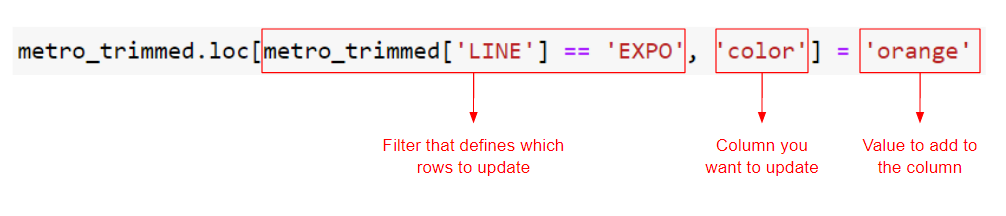

In [ ]:
metro_trimmed.loc[metro_trimmed['LINE'] == 'EXPO', 'color'] = 'orange'

In [ ]:
# check your work
metro_trimmed.loc[metro_trimmed['LINE'] == 'EXPO']

Now, update the color column for all other metro LINE's in the cell below:

In [ ]:
metro_trimmed.loc[metro_trimmed['LINE'] == 'Blue', 'color'] = 'blue'
metro_trimmed.loc[metro_trimmed['LINE'] == 'Blue/EXPO', 'color'] = 'lightblue'
metro_trimmed.loc[metro_trimmed['LINE'] == 'EXPO', 'color'] = 'orange'
metro_trimmed.loc[metro_trimmed['LINE'] == 'Red', 'color'] = 'red'
metro_trimmed.loc[metro_trimmed['LINE'] == 'Red/Purple', 'color'] = 'black'
metro_trimmed.loc[metro_trimmed['LINE'] == 'Purple', 'color'] = 'purple'
metro_trimmed.loc[metro_trimmed['LINE'] == 'Green', 'color'] = 'green'
metro_trimmed.loc[metro_trimmed['LINE'] == 'Gold', 'color'] = 'beige'

In [ ]:
# reset the map (you need to do this to erase previous layers)
m = folium.Map(location=[latitude,longitude], tiles='OpenStreetMap', zoom_start=10)

In [ ]:
# add the stations with color icons
for index, row in metro_trimmed.iterrows():
    tooltip_text = row.LINE + ' Line: ' + row.STATION
    folium.Marker(
        [row.LAT,row.LONG], 
        popup=row.STATION, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m)

# show the map
m

### Saving your folium map as an HTML file

In [ ]:
# save the interactive maps as an html file
# on the JupyterHub for class, you won't be able to save files in the "classwork" folder
# but you will be able to save in the home directory, i.e. in /home/jovyan

m.save('/home/jovyan/metro.html')